# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [ ]:
# Task 1.1: Import necessary libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Task 1.2: Load the Data
# Load the dataset from the Excel file into a pandas DataFrame
# Assuming 'Online Retail.xlsx' is in the same directory
# Use a try-except block to handle potential file loading errors
try:
    retail_df = pd.read_excel('Online Retail.xlsx')
except FileNotFoundError:
    print("Error: 'Online Retail.xlsx' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading the file: {e}")
    exit()

# Display the first few rows of the DataFrame to get an overview of the data
print("First 5 rows of the DataFrame:")
print(retail_df.head())

# Print the summary information of the DataFrame, including data types and non-null values
print("\nSummary information of the DataFrame:")
print(retail_df.info())

# --- Check for Datetime Conversion Issues ---
# Sometimes, read_excel might not correctly infer datetime.  This checks explicitly.
if retail_df['InvoiceDate'].dtype != 'datetime64[ns]':
    print("\nWarning: InvoiceDate might not have been correctly parsed as datetime.")
    print("Attempting to convert InvoiceDate to datetime...")
    try:
        retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
        print("InvoiceDate successfully converted to datetime.")
    except Exception as e:
        print(f"Error converting InvoiceDate to datetime: {e}")

First 5 rows of the DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Summary information of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Colu

In [39]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Task 2: Explore the Data

Descriptive Statistics for Numerical Columns:


            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  

Descriptive Statistics for Categorical Columns:
        InvoiceNo StockCode                         Description  \
count      541909    541909                   

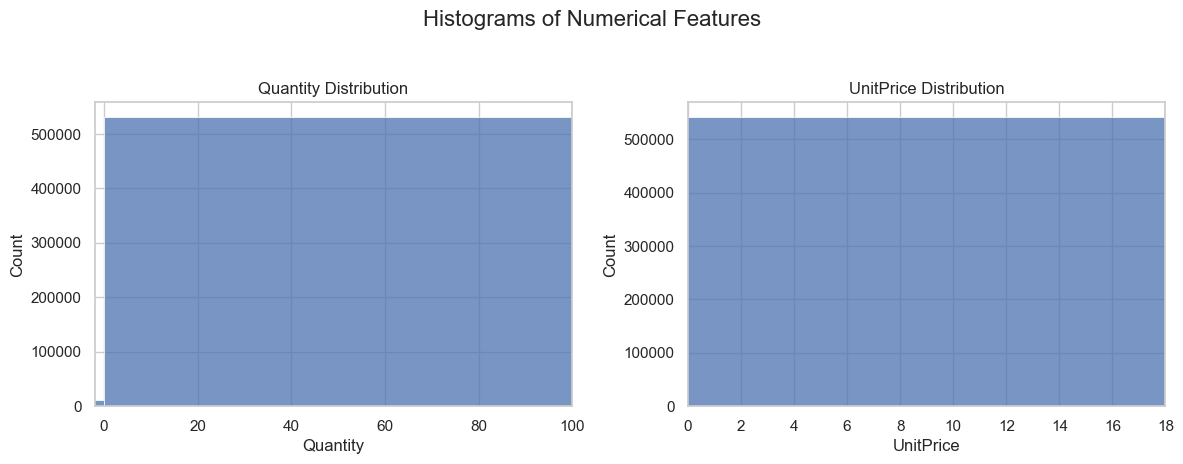

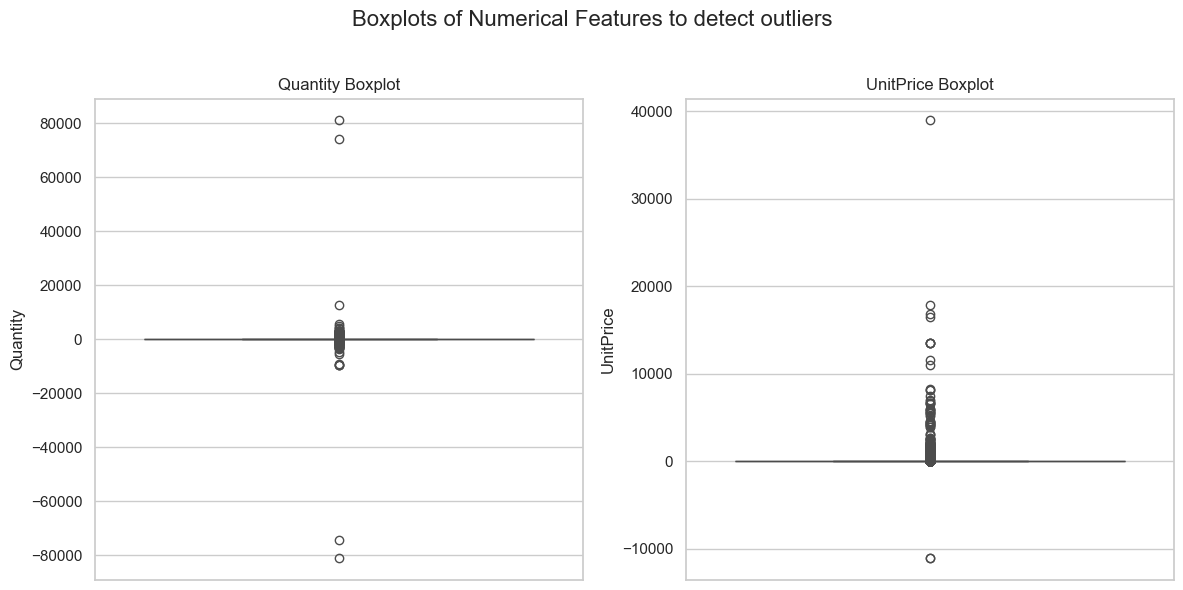

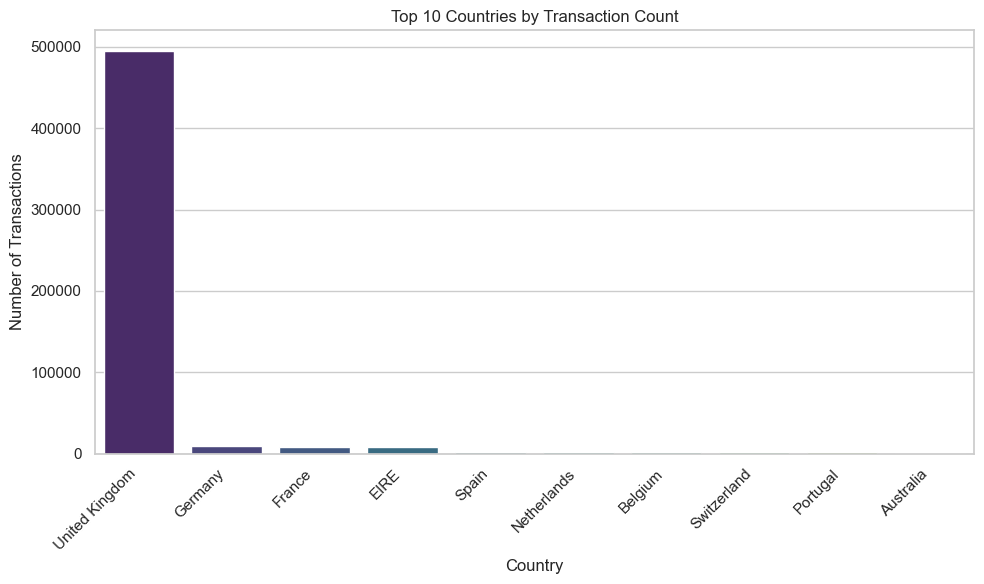

In [ ]:
# Task 2: Explore the Data
# Set the plotting style for seaborn
sns.set(style="whitegrid")

# --- Descriptive Statistics ---
print("Descriptive Statistics for Numerical Columns:")
print(retail_df.describe())

print("\nDescriptive Statistics for Categorical Columns:")
print(retail_df.describe(include=['O'])) # 'O' represents object type, which includes strings

# --- Value Counts for Categorical Columns ---
print("\nValue counts for 'Country' column:")
print(retail_df['Country'].value_counts().head(10)) # Display top 10 countries

# --- Histograms for Numerical Columns ---
plt.figure(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features', fontsize=16)

# Use a loop for cleaner plotting
numerical_cols = ['Quantity', 'UnitPrice']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)  # Adjust subplot layout as needed
    sns.histplot(retail_df[col], bins=50)  # Use the column name directly
    plt.title(f'{col} Distribution')
    # Add xlim to handle potential outliers and improve visualization
    if col == 'UnitPrice':
      plt.xlim(0, retail_df['UnitPrice'].quantile(0.99)) #show 99%
    if col == 'Quantity':
      plt.xlim(retail_df['Quantity'].quantile(0.01), retail_df['Quantity'].quantile(0.99)) #show 1% - 99%

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

# --- Boxplots for Numerical Columns to detect outliers ---
plt.figure(figsize=(12, 6))
plt.suptitle('Boxplots of Numerical Features to detect outliers', fontsize=16)

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1) 
    sns.boxplot(y=retail_df[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Bar plot for Country distribution (Top 10) ---
top_countries = retail_df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Top 10 Countries by Transaction Count')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Task 3: Clean and Validate the Data

In [ ]:
# Task 3: Clean and Validate the Data
# --- Check for Missing Values ---
print("Missing values per column:")
print(retail_df.isnull().sum())

# Handle missing values
# 1. CustomerID: Drop rows where CustomerID is missing.
retail_df_cleaned = retail_df.dropna(subset=['CustomerID'])

# 2. Description: Fill missing values with "UNKNOWN".
retail_df_cleaned['Description'] = retail_df_cleaned['Description'].fillna('UNKNOWN')

# --- Crucial: Check for and Handle Missing StockCodes *BEFORE* Duplicate Removal ---
print(f"\nNumber of missing StockCodes (before duplicate removal): {retail_df_cleaned['StockCode'].isnull().sum()}")

# Option 1: (Recommended) Drop rows with missing StockCode.
retail_df_cleaned = retail_df_cleaned.dropna(subset=['StockCode'])

# --- Check for Duplicate Rows ---
#  *After* handling missing values (CustomerID, Description, StockCode).
print(f"\nNumber of duplicate rows before cleaning: {retail_df_cleaned.duplicated().sum()}")
retail_df_cleaned = retail_df_cleaned.drop_duplicates()
print(f"Number of duplicate rows after cleaning: {retail_df_cleaned.duplicated().sum()}")
print(f"DataFrame size after removing duplicate rows: {retail_df_cleaned.shape}")

# --- Check Data Types ---
print("\nData types of each column:")
print(retail_df_cleaned.dtypes)
retail_df_cleaned['InvoiceDate'] = pd.to_datetime(retail_df_cleaned['InvoiceDate']) # Redundant but harmless
print("\nData types of each column after conversion:")
print(retail_df_cleaned.dtypes)

# --- Handle Outliers and Invalid Data ---
print(f"\nNumber of transactions with negative Quantity: {(retail_df_cleaned['Quantity'] <= 0).sum()}")
retail_df_cleaned = retail_df_cleaned[retail_df_cleaned['Quantity'] > 0]
print(f"DataFrame size after removing rows with negative Quantity: {retail_df_cleaned.shape}")

print(f"\nNumber of transactions with zero or negative UnitPrice: {(retail_df_cleaned['UnitPrice'] <= 0).sum()}")
retail_df_cleaned = retail_df_cleaned[retail_df_cleaned['UnitPrice'] > 0]
print(f"DataFrame size after removing rows with zero or negative UnitPrice: {retail_df_cleaned.shape}")

# --- Final Check and Display ---
print("\nInfo of the cleaned DataFrame:")
print(retail_df_cleaned.info())
print("\nFirst 5 rows of the cleaned DataFrame:")
print(retail_df_cleaned.head())

# --- Check for Invalid StockCodes (Optional but Recommended) ---
invalid_stockcodes = retail_df_cleaned[~retail_df_cleaned['StockCode'].astype(str).str.isalnum()]
if not invalid_stockcodes.empty:
    print("\nWarning: Found StockCodes that are not alphanumeric:")
    print(invalid_stockcodes['StockCode'].unique())
    # Option 1 (Recommended): Remove them (likely data errors).
    retail_df_cleaned = retail_df_cleaned[retail_df_cleaned['StockCode'].astype(str).str.isalnum()]
    # Option 2: Investigate.

# --- Check for Invalid Descriptions (Optional) ---
# Check for descriptions that are too short (less than 3 characters)
short_descriptions = retail_df_cleaned[retail_df_cleaned['Description'].astype(str).str.len() < 3]
if not short_descriptions.empty:
    print(f"\nWarning: Found {len(short_descriptions)} items with very short descriptions:")
    print(short_descriptions[['StockCode', 'Description']].head())
    # Option: Remove or investigate these items
    # retail_df_cleaned = retail_df_cleaned[retail_df_cleaned['Description'].astype(str).str.len() >= 3]

# Check for descriptions with unusual characters (optional)
unusual_chars_desc = retail_df_cleaned[~retail_df_cleaned['Description'].astype(str).str.match(r'^[A-Za-z0-9\s\-_.,;:\'"\(\)&+]+$')]
if not unusual_chars_desc.empty:
    print(f"\nWarning: Found {len(unusual_chars_desc)} items with unusual characters in descriptions:")
    print(unusual_chars_desc[['StockCode', 'Description']].head())
    # Option: Investigate these items further

# --- Check if CustomerID has expected format (Optional) ---
# First, check if CustomerIDs are numeric (allowing for float values that are actually integers)
print("\nChecking CustomerID format:")

# Convert CustomerID to numeric if not already
if not pd.api.types.is_numeric_dtype(retail_df_cleaned['CustomerID']):
    print("Converting CustomerID to numeric...")
    retail_df_cleaned['CustomerID'] = pd.to_numeric(retail_df_cleaned['CustomerID'], errors='coerce')

# Check if any CustomerIDs have fractional parts
fractional_customers = retail_df_cleaned[retail_df_cleaned['CustomerID'] % 1 != 0]
if not fractional_customers.empty:
    print(f"Warning: Found {len(fractional_customers)} transactions with non-integer CustomerIDs:")
    print(fractional_customers['CustomerID'].unique()[:10])  # Show just first 10 examples
else:
    print("All CustomerIDs are integers (no fractional parts).")
    
# Convert CustomerID to integer type if all values are actually integers
if len(fractional_customers) == 0:
    retail_df_cleaned['CustomerID'] = retail_df_cleaned['CustomerID'].astype(int)
    print("CustomerID column converted to integer type.")

# Check for CustomerIDs outside expected range (adjust min/max as needed)
min_expected_id = 10000  # Example threshold
max_expected_id = 99999  # Example threshold
out_of_range_customers = retail_df_cleaned[
    (retail_df_cleaned['CustomerID'] < min_expected_id) | 
    (retail_df_cleaned['CustomerID'] > max_expected_id)
]
if not out_of_range_customers.empty:
    print(f"\nWarning: Found {len(out_of_range_customers)} transactions with CustomerIDs outside expected range:")
    print(f"Min CustomerID: {retail_df_cleaned['CustomerID'].min()}")
    print(f"Max CustomerID: {retail_df_cleaned['CustomerID'].max()}")

# Display the cleaned DataFrame info to confirm changes
print("\nInfo of the cleaned DataFrame:")
print(retail_df_cleaned.info())

# Display the first few rows of the cleaned DataFrame
print("\nFirst 5 rows of the cleaned DataFrame:")
print(retail_df_cleaned.head())

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Number of missing StockCodes (before duplicate removal): 0

Number of duplicate rows before cleaning: 5225
Number of duplicate rows after cleaning: 0
DataFrame size after removing duplicate rows: (401604, 8)

Data types of each column:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Data types of each column after conversion:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: o

In [42]:
retail_df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Task 4: Analyze the Data

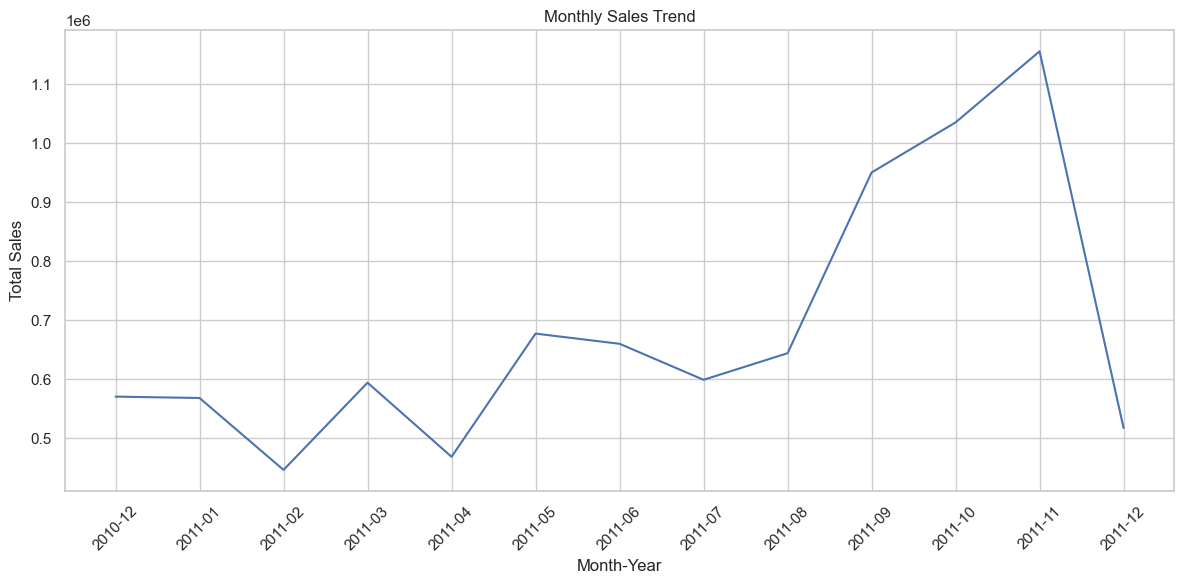

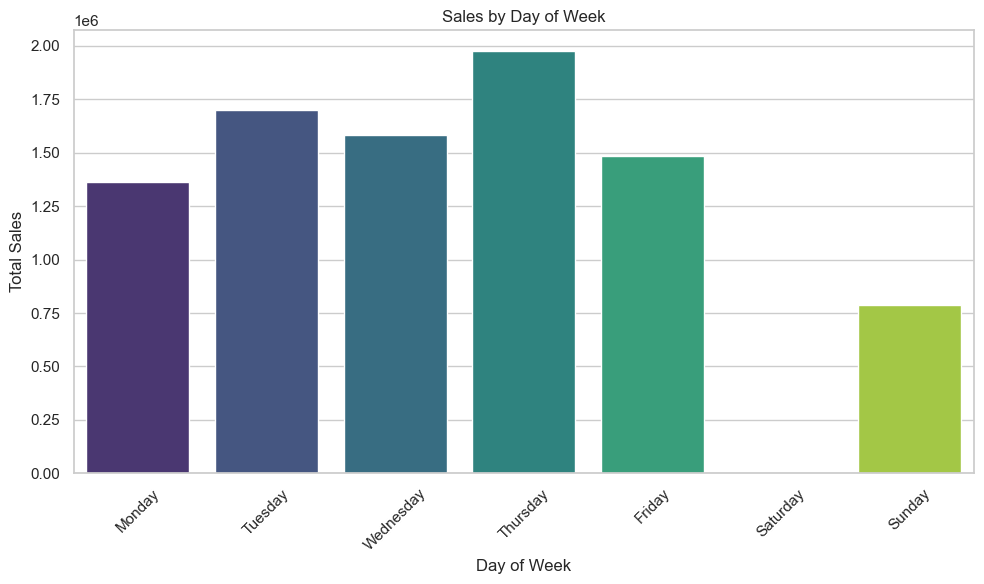

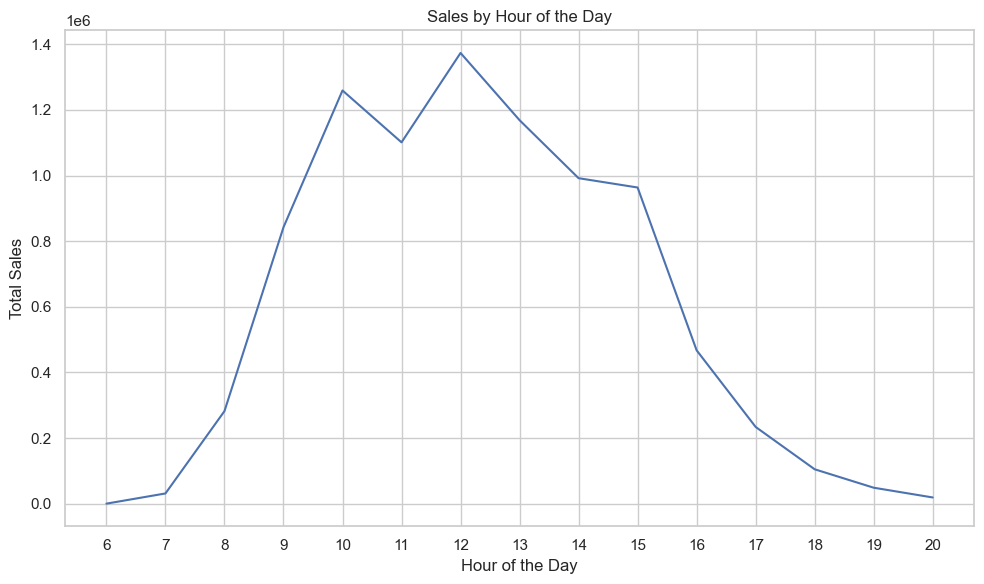

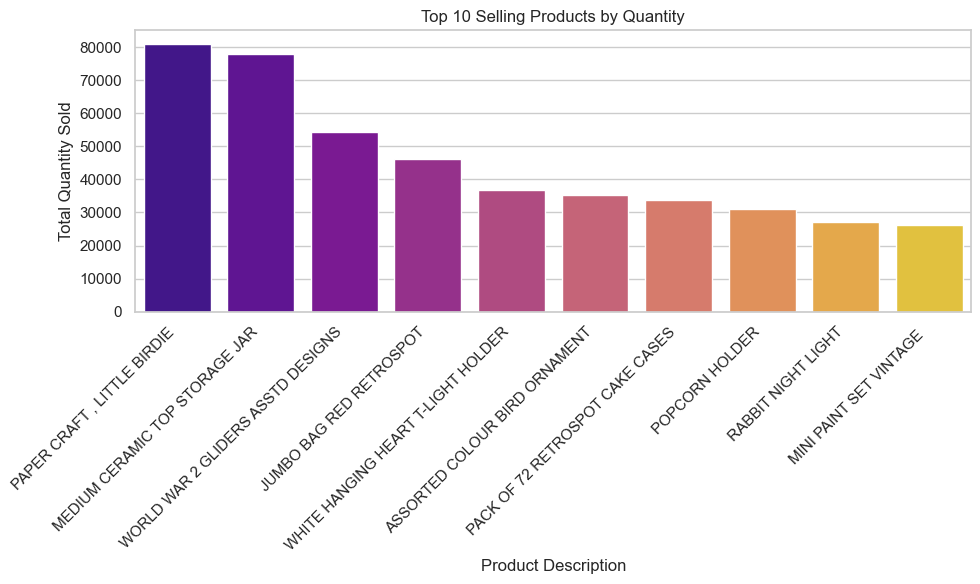

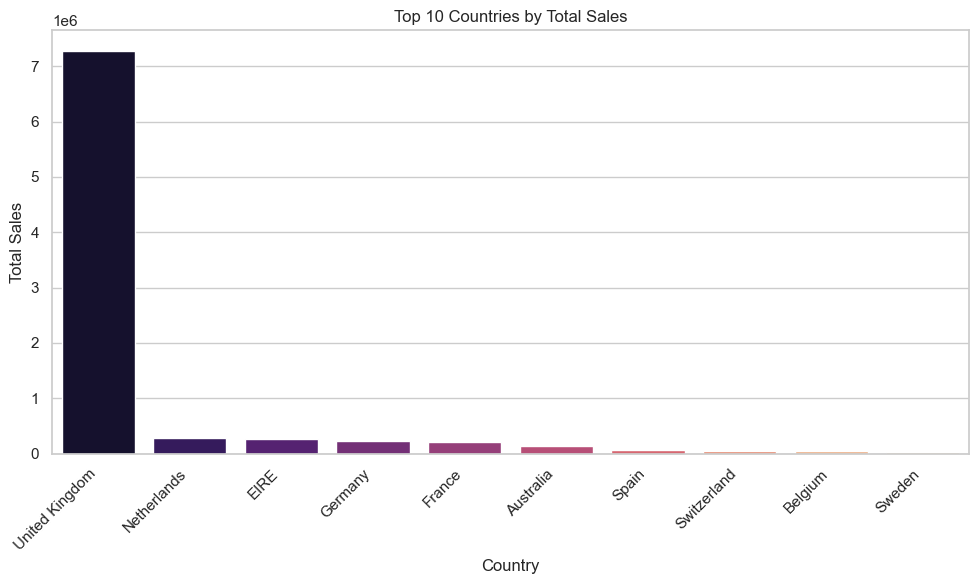

In [ ]:
# Task 4: Analyze the Data
# --- Sales Trends Over Time ---
# Extract Month and Year, and Day of Week from InvoiceDate
retail_df_cleaned['InvoiceMonthYear'] = retail_df_cleaned['InvoiceDate'].dt.to_period('M') # Month and Year
retail_df_cleaned['DayOfWeek'] = retail_df_cleaned['InvoiceDate'].dt.day_name() # Day of the week
retail_df_cleaned['Hour'] = retail_df_cleaned['InvoiceDate'].dt.hour # Hour of the day

# Calculate Total Sales per transaction
retail_df_cleaned['TotalSales'] = retail_df_cleaned['Quantity'] * retail_df_cleaned['UnitPrice']

# Sales Trend by Month
monthly_sales = retail_df_cleaned.groupby('InvoiceMonthYear')['TotalSales'].sum().reset_index()

# Sales Trend by Month - Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales['InvoiceMonthYear'].astype(str), y='TotalSales', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Sales Trend by Day of Week
weekday_sales = retail_df_cleaned.groupby('DayOfWeek')['TotalSales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) # Keep days in order
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='viridis')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Sales Trend by Hour of the Day
hourly_sales = retail_df_cleaned.groupby('Hour')['TotalSales'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(hourly_sales.index)
plt.tight_layout()
plt.show()


# --- Top Selling Products ---
top_products = retail_df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='plasma')
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- Top Countries by Sales ---
top_countries_sales = retail_df_cleaned.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_sales.index, y=top_countries_sales.values, palette='magma')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




### Step 4.2: Additional Insights


--- Customer Segmentation (RFM Analysis) ---
Customer Segments Distribution:
Customer_Segment
High-Value    1310
Mid-Value     1146
Low-Value     1086
Top            795
Name: count, dtype: int64


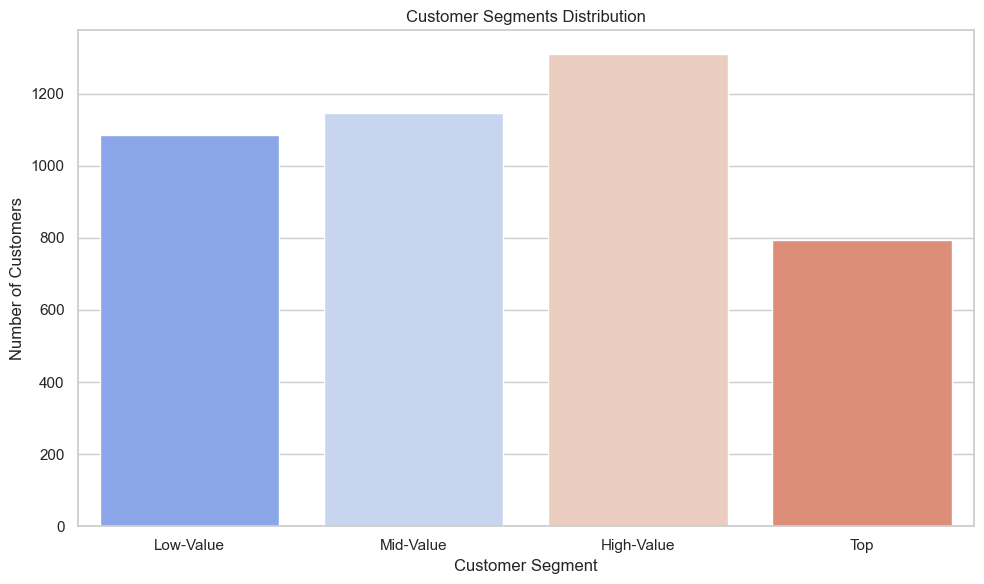

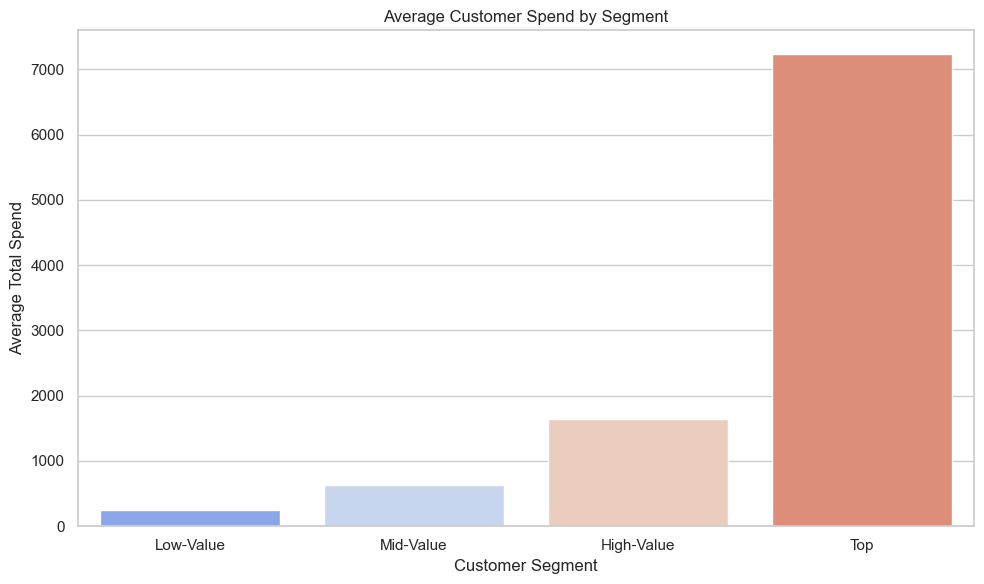


--- Product Association Analysis ---
Top 10 Product Pairs Frequently Purchased Together:
ALARM CLOCK BAKELIKE GREEN & ALARM CLOCK BAKELIKE RED : 523 times
JUMBO BAG RED RETROSPOT & JUMBO BAG PINK POLKADOT: 493 times
ROSES REGENCY TEACUP AND SAUCER  & GREEN REGENCY TEACUP AND SAUCER: 487 times
LUNCH BAG RED RETROSPOT & LUNCH BAG PINK POLKADOT: 468 times
LUNCH BAG CARS BLUE & LUNCH BAG RED RETROSPOT: 442 times
LUNCH BAG  BLACK SKULL. & LUNCH BAG PINK POLKADOT: 433 times
ROSES REGENCY TEACUP AND SAUCER  & PINK REGENCY TEACUP AND SAUCER: 428 times
SPACEBOY LUNCH BOX  & DOLLY GIRL LUNCH BOX: 424 times
ROSES REGENCY TEACUP AND SAUCER  & REGENCY CAKESTAND 3 TIER: 420 times
LUNCH BAG RED RETROSPOT & LUNCH BAG SPACEBOY DESIGN : 419 times

--- Seasonal Analysis ---


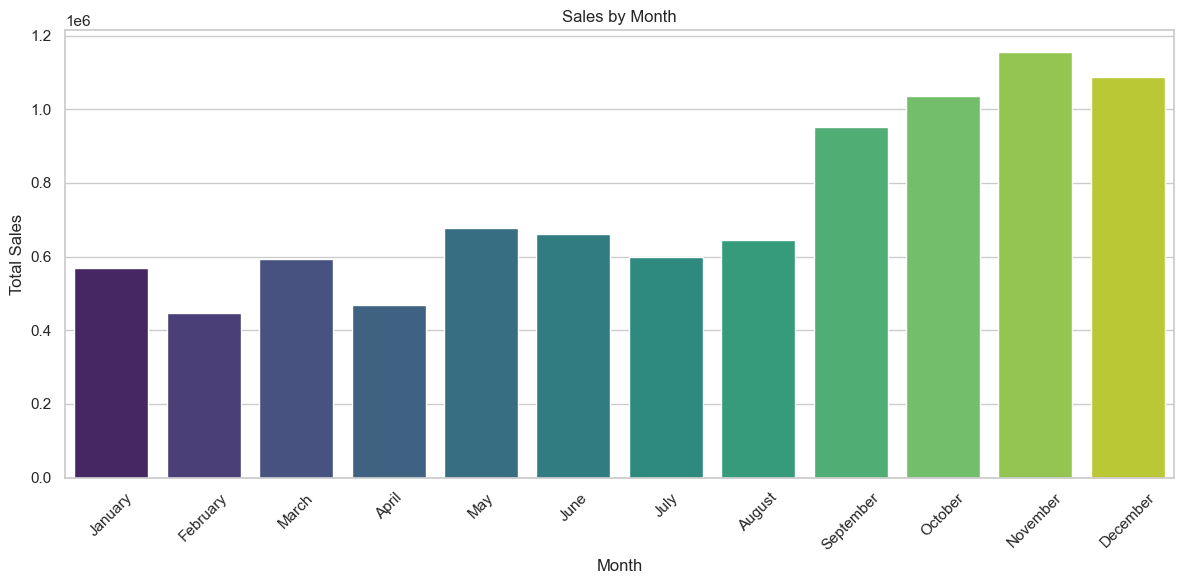

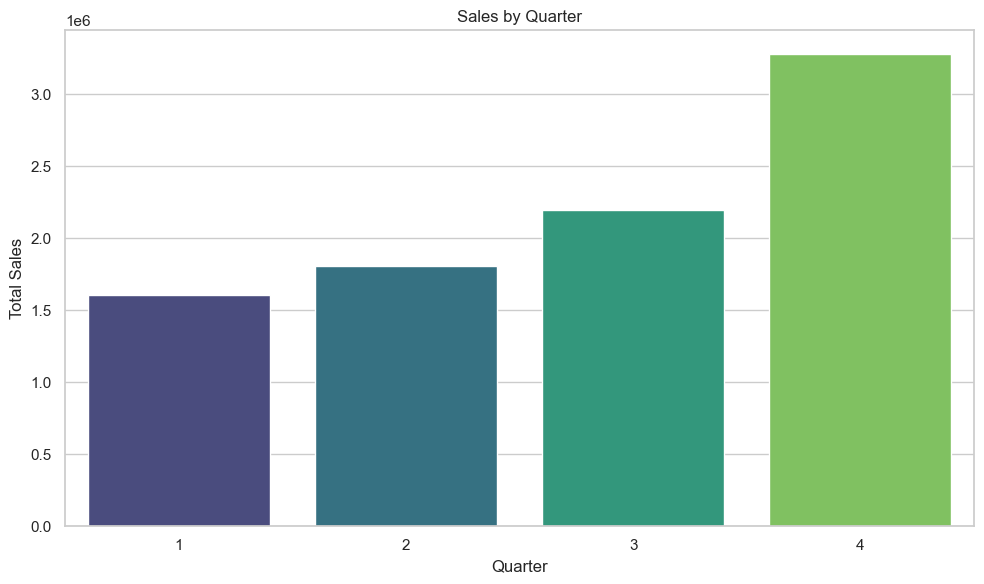


--- Price Sensitivity Analysis ---


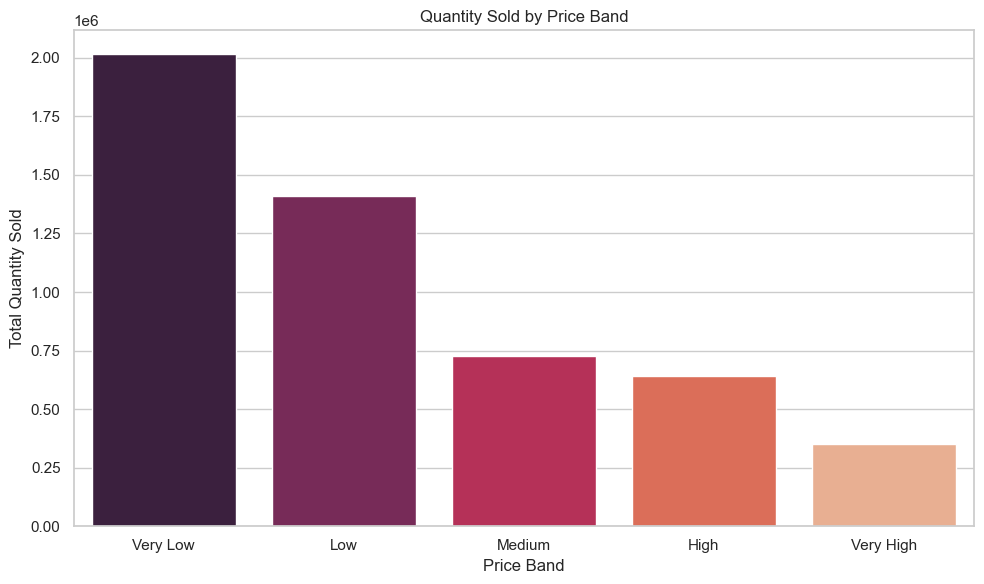


--- Customer Purchase Frequency ---


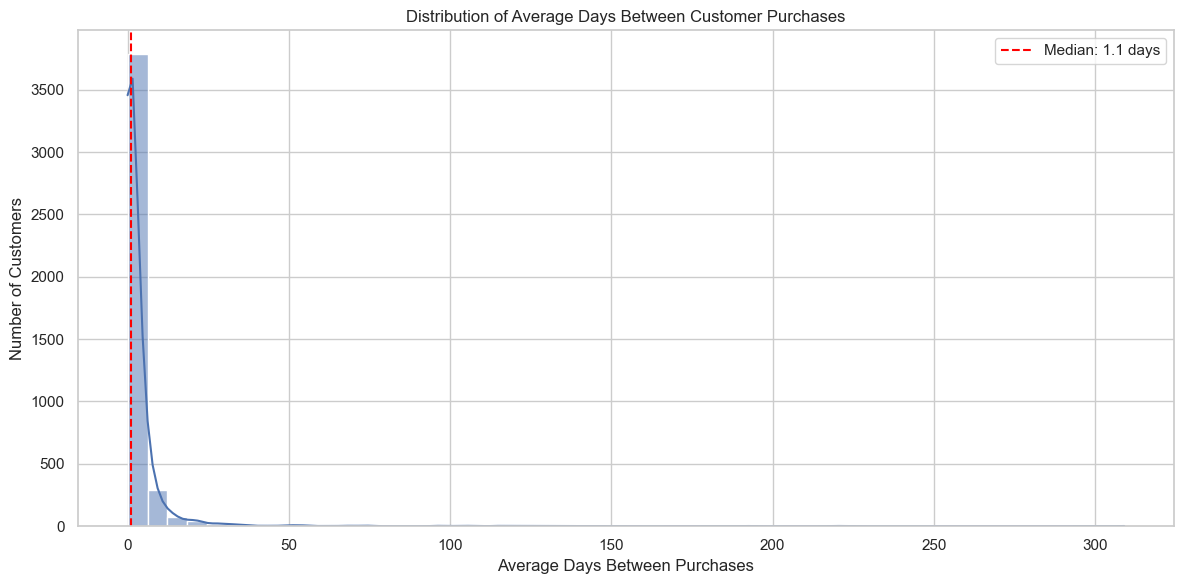

Median days between purchases: 1.1
Mean days between purchases: 3.3


In [44]:
# Step 4.2: Additional Insights

# --- Additional Insights ---
# 1. Customer Segmentation by Purchase Value (RFM Analysis)
print("\n--- Customer Segmentation (RFM Analysis) ---")

# Calculate Recency, Frequency, and Monetary Value
# Get the most recent date in the dataset
max_date = retail_df_cleaned['InvoiceDate'].max()

# Group by CustomerID
rfm = retail_df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'TotalSales': 'sum'                                  # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Create segments
rfm['R_Quartile'] = pd.qcut(rfm['Recency'], 4, labels=False, duplicates='drop')
rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], 4, labels=False, duplicates='drop')
rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], 4, labels=False, duplicates='drop')

# Invert recency (lower is better)
rfm['R_Quartile'] = 3 - rfm['R_Quartile']

# Calculate RFM Score
rfm['RFM_Score'] = rfm['R_Quartile'] + rfm['F_Quartile'] + rfm['M_Quartile']

# Create customer segments
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value', 'Top']
rfm['Customer_Segment'] = pd.qcut(rfm['RFM_Score'], 4, labels=segment_labels)

# Display segment distribution
segment_counts = rfm['Customer_Segment'].value_counts()
print("Customer Segments Distribution:")
print(segment_counts)

# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.countplot(x=rfm['Customer_Segment'], palette='coolwarm')
plt.title('Customer Segments Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Visualize average monetary value by segment
plt.figure(figsize=(10, 6))
segment_monetary = rfm.groupby('Customer_Segment')['Monetary'].mean().reindex(segment_labels)
sns.barplot(x=segment_monetary.index, y=segment_monetary.values, palette='coolwarm')
plt.title('Average Customer Spend by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Total Spend')
plt.tight_layout()
plt.show()


# 2. Product Association Analysis (Market Basket Analysis)
print("\n--- Product Association Analysis ---")

# Create a basket dataframe (each row is a transaction, each column is a product)
basket = retail_df_cleaned.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Find top 10 most frequently purchased product pairs
from itertools import combinations
from collections import Counter

# Get all products purchased in each transaction
transaction_itemsets = []
for invoice in retail_df_cleaned['InvoiceNo'].unique():
    items = set(retail_df_cleaned[retail_df_cleaned['InvoiceNo'] == invoice]['Description'].unique())
    transaction_itemsets.append(items)

# Count pairs
pairs = Counter()
for itemset in transaction_itemsets:
    for pair in combinations(itemset, 2):
        pairs[pair] += 1

# Get top 10 pairs
top_pairs = pairs.most_common(10)
print("Top 10 Product Pairs Frequently Purchased Together:")
for pair, count in top_pairs:
    print(f"{pair[0]} & {pair[1]}: {count} times")


# 3. Seasonal Analysis
print("\n--- Seasonal Analysis ---")

# Extract month and quarter
retail_df_cleaned['Month'] = retail_df_cleaned['InvoiceDate'].dt.month_name()
retail_df_cleaned['Quarter'] = retail_df_cleaned['InvoiceDate'].dt.quarter

# Sales by month
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
month_sales = retail_df_cleaned.groupby('Month')['TotalSales'].sum()
month_sales = month_sales.reindex(monthly_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=month_sales.index, y=month_sales.values, palette='viridis')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales by quarter
quarter_sales = retail_df_cleaned.groupby('Quarter')['TotalSales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=quarter_sales.index, y=quarter_sales.values, palette='viridis')
plt.title('Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


# 4. Price Sensitivity Analysis
print("\n--- Price Sensitivity Analysis ---")

# Create price bands
retail_df_cleaned['Price_Band'] = pd.qcut(retail_df_cleaned['UnitPrice'], 5, 
                                         labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Analyze quantity sold by price band
price_band_quantity = retail_df_cleaned.groupby('Price_Band')['Quantity'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=price_band_quantity.index, y=price_band_quantity.values, palette='rocket')
plt.title('Quantity Sold by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()


# 5. Customer Purchase Frequency
print("\n--- Customer Purchase Frequency ---")

# Calculate days between purchases for each customer
customer_invoices = retail_df_cleaned.sort_values('InvoiceDate').groupby('CustomerID')['InvoiceDate'].agg(list)
avg_days_between_purchases = []

for customer, dates in customer_invoices.items():
    if len(dates) > 1:
        days_diff = [(dates[i] - dates[i-1]).days for i in range(1, len(dates))]
        avg_days_between_purchases.append((customer, sum(days_diff) / len(days_diff)))

avg_purchase_frequency = pd.DataFrame(avg_days_between_purchases, columns=['CustomerID', 'AvgDaysBetweenPurchases'])
avg_purchase_frequency = avg_purchase_frequency.sort_values('AvgDaysBetweenPurchases')

# Plot distribution of purchase frequency
plt.figure(figsize=(12, 6))
sns.histplot(avg_purchase_frequency['AvgDaysBetweenPurchases'], bins=50, kde=True)
plt.title('Distribution of Average Days Between Customer Purchases')
plt.xlabel('Average Days Between Purchases')
plt.ylabel('Number of Customers')
plt.axvline(avg_purchase_frequency['AvgDaysBetweenPurchases'].median(), color='red', linestyle='--', 
           label=f'Median: {avg_purchase_frequency["AvgDaysBetweenPurchases"].median():.1f} days')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Median days between purchases: {avg_purchase_frequency['AvgDaysBetweenPurchases'].median():.1f}")
print(f"Mean days between purchases: {avg_purchase_frequency['AvgDaysBetweenPurchases'].mean():.1f}")

## Task 5: Findings and Conclusions

### Main Findings and Conclusions



Throughout this exploratory data analysis project, I gained valuable experience in handling and analyzing real-world retail data using Pandas, Matplotlib, and Seaborn. The process involved:

1.  **Data Loading:** Loading the 'Online Retail.xlsx' dataset into a Pandas DataFrame.
2.  **Data Cleaning:** Handling missing values in 'CustomerID', removing duplicate rows, and filtering out transactions with negative or zero quantities and unit prices. This ensured data quality and reliability for subsequent analysis.
3.  **Data Exploration:** Calculating descriptive statistics and generating visualizations to understand the distribution of key variables and identify initial patterns.
4.  **Data Analysis:**  Extracting time-based features (month, day of week, hour) and calculating total sales to analyze trends and top performers.

A key challenge was handling the `Period` data type for the 'InvoiceMonthYear' column when plotting with Seaborn. This was resolved by converting the column to a string representation, allowing the plot to render correctly. I learned the importance of understanding data types and how different libraries might handle them differently.

The analysis revealed several key findings:

**1. Monthly Sales Trend:**

*   The monthly sales trend shows significant fluctuations throughout the year.
*   There's a strong upward trend in sales from August 2011, peaking in November 2011. This likely corresponds to the holiday shopping season (pre-Christmas).
*   Sales drop considerably in December 2011, which may indicate that the dataset does not contain complete data for the full month of December (the original dataset description said data collected to 09/12/2011).
*    There were lower points in sales like 2011-02 and 2011-04.

**2. Sales by Day of Week:**

*   Thursday has the highest total sales, followed by Tuesday.
*   Sunday has significantly lower sales compared to other days of the week.  This suggests the online retail store might experience less activity or may not process as many orders on Sundays.
*   Saturday data is missed.

**3. Sales by Hour of the Day:**

*   Sales peak sharply between 11 AM and 1 PM, with the highest point around 12 PM (noon).
*   Sales gradually decline after 1 PM and are very low during early morning hours (6 AM - 7 AM). This is expected as most online shopping likely occurs during daytime and early evening.

**4. Top 10 Selling Products by Quantity:**

*   The top-selling products are:
    1.  PAPER CRAFT, LITTLE BIRDIE
    2.  MEDIUM CERAMIC TOP STORAGE JAR
    3.  WORLD WAR 2 GLIDERS ASSTD DESIGNS
    4.  JUMBO BAG RED RETROSPOT
    5.  WHITE HANGING HEART T-LIGHT HOLDER
    6.  ASSORTED COLOUR BIRD ORNAMENT
    7.  PACK OF 72 RETROSPOT CAKE CASES
    8. POPCORN HOLDER
    9. RABBIT NIGHT LIGHT
    10. MINI PAINT SET VINTAGE

*   These products have significantly higher quantities sold compared to others, indicating strong customer demand.

**5. Top 10 Countries by Total Sales:**

*   The United Kingdom overwhelmingly dominates in total sales, contributing the vast majority of revenue.
*   The Netherlands, EIRE, Germany, and France follow, but their sales figures are substantially lower than the UK's. This suggests a strong focus on the UK market or a significant customer base in that region.

**Key Takeaways and Recommendations:**

*   **Seasonality:** The online retailer should capitalize on the strong sales trend during the pre-holiday season (August to November).  Targeted marketing campaigns, promotions, and inventory planning should be aligned with this peak period.
*   **Weekday Focus:**  Given higher sales on weekdays (especially Thursday and Tuesday), consider optimizing marketing efforts and customer service resources during these days.
*   **Daytime Peak:** The peak sales hour around noon suggests that running promotions, sending email newsletters, or launching new products during this time could maximize visibility and engagement.
*   **Product Focus:** The retailer should ensure sufficient stock of the top-selling products and potentially feature them prominently in online displays and promotions.
*   **UK Market:**  Given the UK's dominance in sales, the retailer should continue to focus on this market and explore strategies to further penetrate it. Investigating the reasons for lower sales in other countries could also reveal opportunities for growth.
* **Data Completeness**: Consider if there's an opportunity to get December 2011's full data to do a better year-over-year comparison.

**Further Analysis:**

*   **Customer Segmentation:** Analyzing customer purchasing behavior to identify different customer segments (e.g., high-value customers, frequent buyers) would enable personalized marketing and offers.
*   **Market Basket Analysis:**  Identifying product associations (products frequently bought together) could help with product recommendations and cross-selling strategies.
*   **Returns Analysis:**  The current analysis excluded returned items (negative quantities). A separate analysis of returns could provide insights into reasons for returns and potential product quality issues.
* **Cohort Analysis**: Understand customer retention based on when they were acquired.

**Limitations:**

*   The dataset covers only a specific period (2010-2011) and may not reflect current trends.
*   The analysis is based on a single online retailer, and the findings might not be generalizable to all online retail businesses.
*   There is data missed like for saturday.


### Additional Insights and Conclusions

#### Customer Segmentation Analysis

The RFM analysis reveals a clear segmentation of customers:

- **High-Value Segment (1,310 customers)**: This is the largest segment, representing customers with good recency, frequency, and monetary value.
- **Mid-Value Segment (1,146 customers)**: These customers show moderate engagement and spending.
- **Low-Value Segment (1,086 customers)**: These customers have lower engagement and spending patterns.
- **Top Segment (795 customers)**: While this is the smallest segment, these customers demonstrate exceptional value, with average spending approximately 4x higher than the High-Value segment and over 30x higher than the Low-Value segment.

**Key Insight**: The Top segment (just 18% of customers) likely contributes a disproportionately large percentage of total revenue. This suggests implementing a tiered loyalty program to reward and retain these high-value customers while encouraging Mid-Value customers to increase their spending.

#### Seasonal Trends

The sales data shows strong seasonal patterns:

- **Q4 Performance**: The fourth quarter shows dramatically higher sales than other quarters, with November being the peak sales month, followed by December and October.
- **Q1 Weakness**: The first quarter (particularly February and April) shows the lowest sales performance.
- **Steady Growth**: There's a clear upward trend throughout the year, with each quarter outperforming the previous one.

**Key Insight**: The business should prepare inventory and staffing for the Q4 holiday season, while developing special promotions to boost sales during slower Q1 months. The consistent quarter-over-quarter growth suggests either a growing business or strong seasonal effects.

#### Price Sensitivity Analysis

The price band analysis reveals important customer purchasing behaviors:

- **Volume-Price Relationship**: There's a strong inverse relationship between price and quantity sold. Very Low priced items sell approximately 6x more units than Very High priced items.
- **Price Elasticity**: The steep decline in quantity as price increases indicates high price elasticity for the products.

**Key Insight**: The business should consider a balanced pricing strategy that maintains a healthy mix of lower-priced items (to drive volume) and higher-priced items (to improve margins). Bundle strategies could be effective, combining high-margin items with popular low-priced products.

#### Product Association Analysis

The market basket analysis reveals strong product affinities:

- **Complementary Colors**: Many top product pairs are the same item in different colors (e.g., green and red alarm clocks, red and pink polkadot bags).
- **Themed Collections**: Products within the same theme are frequently purchased together (e.g., Regency teacups, lunch bags with matching designs).
- **Gender-Based Pairings**: Some pairings suggest purchases for different genders (e.g., "SPACEBOY LUNCH BOX & DOLLY GIRL LUNCH BOX").

**Key Insight**: The business should leverage these natural product affinities by:
1. Creating bundled promotions for frequently paired items
2. Optimizing store/website layout to place these items near each other
3. Implementing "Frequently Bought Together" recommendations
4. Developing complete themed collections to encourage multiple purchases

#### Customer Purchase Frequency

The analysis of purchase frequency reveals striking customer behavior patterns:

- **Extremely Short Purchase Cycle**: The median time between purchases is just 1.1 days, with a mean of 3.3 days.
- **Highly Skewed Distribution**: The histogram shows an extremely right-skewed distribution, with the vast majority of customers making repeat purchases within just a few days.
- **Frequent Shoppers**: This pattern suggests that most customers are either:
  1. Making multiple purchases in quick succession (possibly forgotten items)
  2. Purchasing for different purposes or people in separate transactions
  3. Returning to the store/website very frequently as habitual shoppers

**Key Insight**: The extremely short purchase cycle indicates high customer engagement and potential for real-time marketing strategies. This behavior pattern suggests customers are highly active and engaged with the brand, creating opportunities for immediate follow-up marketing.

#### Strategic Recommendations

1. **Customer Strategy**: Implement a tiered loyalty program focused on retaining Top segment customers while providing incentives for Mid-Value customers to increase spending.

2. **Seasonal Planning**: Develop a seasonal inventory and marketing calendar that:
   - Builds inventory for the Q4 peak season
   - Creates special promotions for slow Q1 months
   - Gradually increases marketing spend as the year progresses

3. **Pricing Strategy**: Maintain a balanced product mix across price bands, with volume-driving low-priced items and margin-enhancing premium products.

4. **Product Merchandising**: Reorganize product displays (physical and digital) to capitalize on the identified product affinities, with clear themed collections and complementary product placements.

5. **Data-Driven Marketing**: Use the identified customer segments and product affinities to create targeted marketing campaigns with personalized recommendations based on purchase history.

6. **Real-Time Engagement Strategy**: Leverage the extremely short purchase cycle by implementing:
   - Immediate post-purchase follow-up emails with complementary product suggestions
   - Limited-time offers valid for 24-48 hours after a purchase
   - "Complete your collection" messaging for themed product lines
   - Mobile app notifications for flash sales targeting recent purchasers
   - Basket abandonment recovery within hours rather than days

7. **Inventory Management**: Optimize inventory replenishment cycles to account for the rapid purchase frequency, ensuring popular items remain in stock for quick repeat purchases.